In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('../data/MachineLearningRating_v3.txt', delimiter='|', low_memory=False) 

In [2]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

# Get the current directory
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)
from scripts.descriptive_statstics import Stat

c:\Users\HP\Documents\10-Academy\AlphaCare-Insurance-Solutions-WEEK3\notebooks
c:\Users\HP\Documents\10-Academy\AlphaCare-Insurance-Solutions-WEEK3


In [3]:
analyzer = Stat(data)

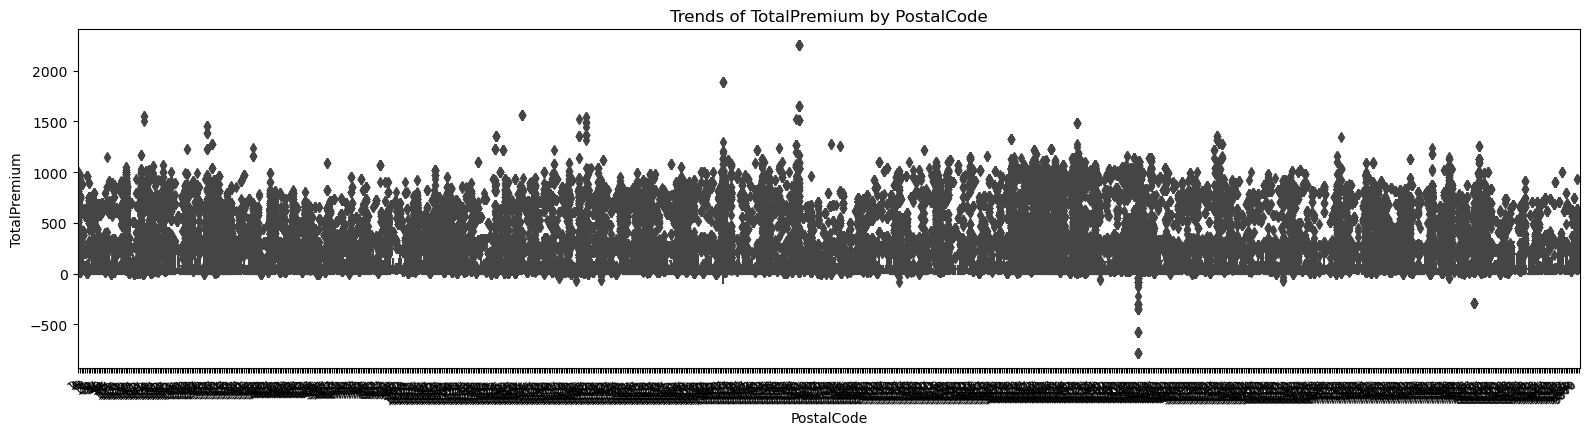

AttributeError: 'numpy.int64' object has no attribute 'startswith'

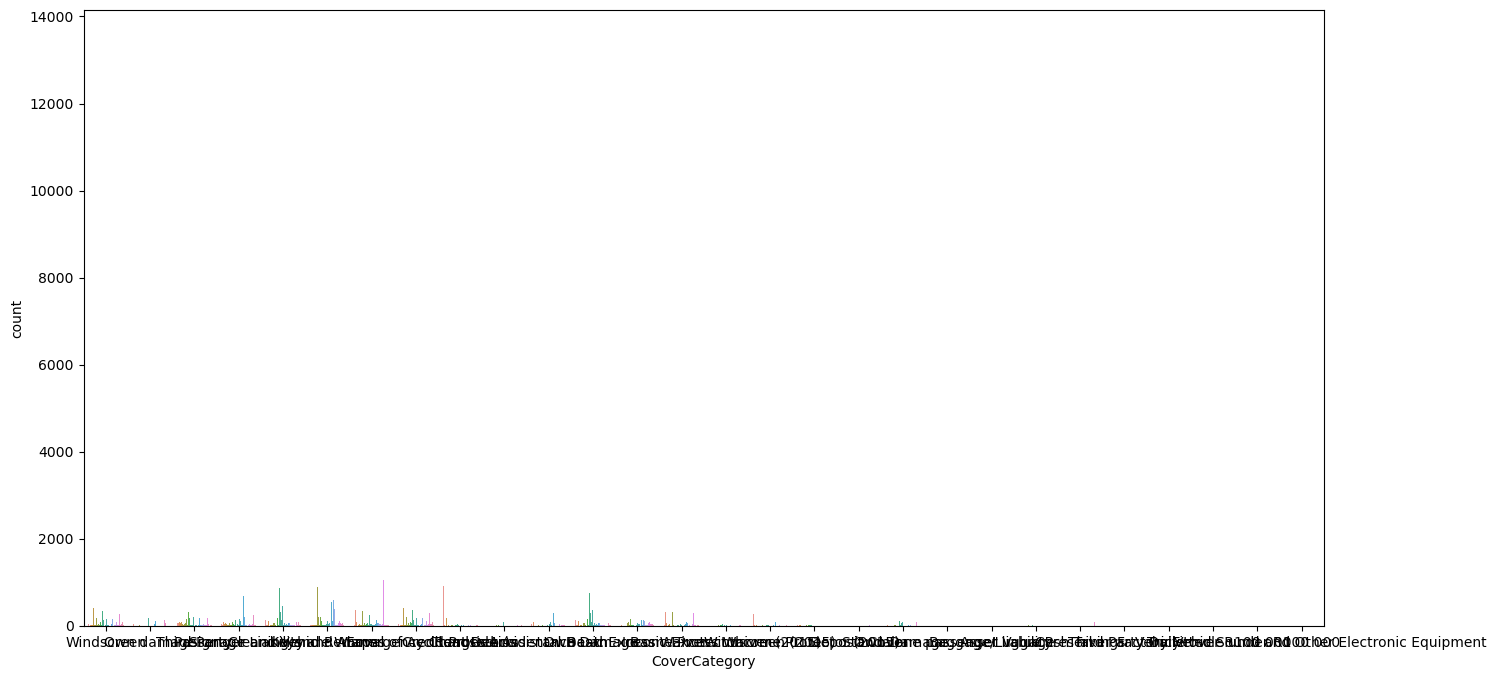

In [4]:
# Filter relevant columns
relevant_columns = ['PostalCode', 'CoverCategory', 'TotalPremium', 'make']
df_relevant = data[relevant_columns].dropna()

# Plot trends
analyzer.plot_geographic_trends(df_relevant, 'PostalCode', 'TotalPremium', 'CoverCategory')
analyzer.plot_geographic_trends(df_relevant, 'PostalCode', 'TotalPremium', 'make')

In [ ]:
data.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')